In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


In [308]:
df_all=pd.read_excel('../data_v3/전국경락단가.xlsx')
df_18_price=pd.read_excel('../../원본데이터/18년도 가격데이터.xlsx')
df_19_price=pd.read_excel('../../원본데이터/19년도 가격데이터.xlsx')
df_20_price=pd.read_excel('../../원본데이터/20년도 가격데이터1.xlsx')
df_21_price=pd.read_excel('../../원본데이터/21년도 가격데이터.xlsx')

In [309]:
#첫번째 행 삭제
df_18_price.drop(0,axis=0,inplace=True)
df_19_price.drop(0,axis=0,inplace=True)
#df_20_price.drop(0,axis=0,inplace=True)
df_21_price.drop(0,axis=0,inplace=True)

In [310]:
df_18_price['도축일']=pd.to_datetime(df_18_price['도축일'].astype(str))
df_19_price['도축일']=pd.to_datetime(df_19_price['도축일'].astype(str))
df_20_price['도축일']=pd.to_datetime(df_20_price['도축일'].astype(str))
df_21_price['도축일']=pd.to_datetime(df_21_price['도축일'].astype(str))

### 크롤링한 도매가격

In [311]:
df_all['date']=pd.to_datetime(df_all['date'])
df_all['price'] = df_all['price'].astype(int)

In [312]:
df_sorted = df_all.sort_values(by='date')

In [313]:
df_sorted.tail()

,date,price
4,2021-12-27,4825
3,2021-12-28,4674
2,2021-12-29,4904
1,2021-12-30,5000
0,2021-12-31,5062


### 한 경매장에서의 도매가격

In [314]:
df_price=pd.concat([df_18_price,df_19_price,df_20_price,df_21_price])

In [315]:
df_price_all=df_price[['업체코드','업체명','도축일','도체번호','경락단가']]

In [326]:
df_price_all_2column=df_price_all[['도축일',"경락단가"]]

df_price_all_2column.shape

(224201, 2)

In [327]:
df_price_all_2column.head()

,도축일,경락단가
1,2018-01-02,3622.0
2,2018-01-02,3755.0
3,2018-01-02,3700.0
4,2018-01-02,3733.0
5,2018-01-02,2199.0


In [328]:
df_price_all_2column['경락단가_평균'] = df_price_all_2column.groupby(['도축일'])['경락단가'].transform('mean')

df_price_all_2column.head()

df_price_all_2column=df_price_all_2column.groupby(df_price_all_2column['도축일']).mean()

df_price_all_2column.reset_index(inplace=True)

C:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [330]:
df_price_all_2column.tail()

,도축일,경락단가,경락단가_평균
858,2021-12-27,4547.071429,4547.071429
859,2021-12-28,4373.212544,4373.212544
860,2021-12-29,4278.649485,4278.649485
861,2021-12-30,4322.080986,4322.080986
862,2021-12-31,4138.037190,4138.037190


In [331]:
df_price_all_2column[df_price_all_2column['도축일']=='2018-01-02']

,도축일,경락단가,경락단가_평균
0,2018-01-02,3750.366093,3750.366093


### 하나의 데이터셋 만들기

In [333]:
df_merged=pd.merge(df_sorted, df_price_all_2column, left_on = 'date', right_on = '도축일', how = 'left')

In [334]:
df_merged.fillna(method= 'ffill',inplace=True)

In [335]:
df_merged

,date,price,도축일,경락단가,경락단가_평균
0,2018-01-02,4104,2018-01-02,3750.366093,3750.366093
1,2018-01-03,4049,2018-01-03,3547.574932,3547.574932
2,2018-01-04,3920,2018-01-04,3696.060897,3696.060897
3,2018-01-05,3917,2018-01-05,3770.156364,3770.156364
4,2018-01-08,4090,2018-01-08,3809.974684,3809.974684
5,2018-01-09,4079,2018-01-09,3723.371930,3723.371930
6,2018-01-10,4162,2018-01-10,3694.435484,3694.435484
7,2018-01-11,4043,2018-01-11,3740.687243,3740.687243
8,2018-01-12,3814,2018-01-12,3748.212245,3748.212245
9,2018-01-15,4122,2018-01-15,3800.211009,3800.211009


### 도매가격 그래프

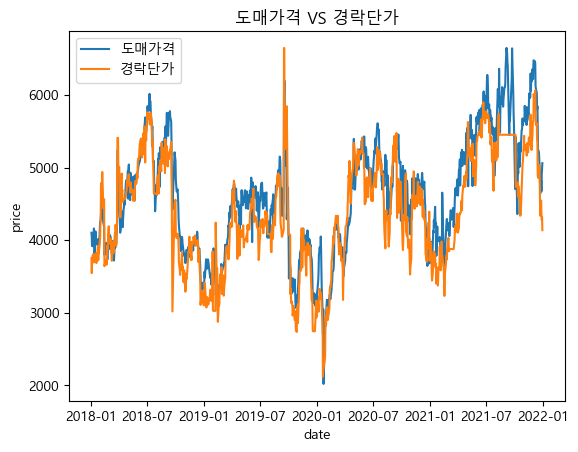

In [337]:
import matplotlib.pyplot as plt

# 데이터
x = df_merged['date']
y = df_merged['price']
y2=df_merged['경락단가_평균']

# 그래프 그리기
plt.plot(x, y,label='도매가격')
plt.plot(x, y2,label='경락단가')
# 그래프 타이틀 및 축 레이블 설정
plt.title('도매가격 VS 경락단가')
plt.xlabel('date')
plt.ylabel('price')

# 범례 추가
plt.legend()
# 그래프 표시
plt.show()


In [323]:
new_df_price_all_2column['경락단가_평균']

0      4242.310204
1      3551.655319
2      3615.154762
3      3079.395745
4      2875.569930
5      3120.207668
6      3102.643636
7      3119.700730
8      3394.311284
9      3529.162500
10     3507.039634
11     3466.751724
12     3631.324759
13     3260.601974
14     3507.935065
15     3515.544444
16     3237.163102
17     3304.590296
18     3373.711048
19     3486.207493
20     3755.055738
21     3824.485437
22     3908.094118
23     3921.432161
24     3827.040872
25     3814.152778
26     3738.935574
27     4021.442446
28     4242.751092
29     4181.678571
30     4245.433594
31     4188.509259
32     4522.553191
33     4676.131707
34     4515.033898
35     4820.220532
36     4776.008439
37     4527.454183
38     4374.290000
39     4257.371429
40     4399.696319
41     4241.356223
42     4211.936709
43     4039.900000
44     3743.269058
45     4036.714286
46     4122.708661
47     4203.014493
48     4064.000000
49     3788.668033
50     4147.663717
51     4047.087059
52     4101.